In [27]:
import os
import numpy as np
import cv2
from PIL import Image
import pylab as pl
import pandas as pd
from tqdm import tqdm
from glob import glob
import torch
import torchvision.transforms as transforms
from dataloader.EyeQ_loader import DatasetGenerator
from networks.densenet_mcf import dense121_mcs

#dirs=os.listdir('/media/zyi/litao/retinal_age_projects/data/ukb/ukb_right')
dirs = glob(os.path.join('/media/zyi/litao/retinal_age_projects/data/ukb/Guangzhou-normal-cohort-fundus-photo', '*', '*', '*'))
df=pd.DataFrame()
df['dir']=dirs
# df['dir']='/media/zyi/litao/retinal_age_projects/data/ukb/ukb_right/'+df['filename']
df.head()

,dir
0,/media/zyi/litao/retinal_age_projects/data/ukb...
1,/media/zyi/litao/retinal_age_projects/data/ukb...
2,/media/zyi/litao/retinal_age_projects/data/ukb...
3,/media/zyi/litao/retinal_age_projects/data/ukb...
4,/media/zyi/litao/retinal_age_projects/data/ukb...


In [28]:
!pwd

/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/MCF_Net


In [29]:
torch.__version__

'1.7.0'

In [30]:
torch.cuda.is_available()

True

In [31]:
df.shape

(4777, 1)

In [32]:
lt=df.reset_index(drop=True)
lt

,dir
0,/media/zyi/litao/retinal_age_projects/data/ukb...
1,/media/zyi/litao/retinal_age_projects/data/ukb...
2,/media/zyi/litao/retinal_age_projects/data/ukb...
3,/media/zyi/litao/retinal_age_projects/data/ukb...
4,/media/zyi/litao/retinal_age_projects/data/ukb...
...,...
4772,/media/zyi/litao/retinal_age_projects/data/ukb...
4773,/media/zyi/litao/retinal_age_projects/data/ukb...
4774,/media/zyi/litao/retinal_age_projects/data/ukb...
4775,/media/zyi/litao/retinal_age_projects/data/ukb...


In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = dense121_mcs(n_class=3)
loaded_model = torch.load('DenseNet121_v3_v1.tar')
model.load_state_dict(loaded_model['state_dict'])
model.to(device)

transformList2 = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
transform_list_val1 = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
    ])
data_test = DatasetGenerator(df=lt, transform1=transform_list_val1,
                             transform2=transformList2, n_class=3, set_name='test', text_removal=True)
test_loader = torch.utils.data.DataLoader(dataset=data_test, batch_size=4,
                                          shuffle=False, num_workers=1, pin_memory=True)

outPRED_mcs = torch.FloatTensor().cuda()
model.eval()
iters_per_epoch = len(test_loader)

results=[]
for epochID, (imagesA, imagesB, imagesC) in enumerate(tqdm(test_loader)):
    imagesA = imagesA.cuda()
    imagesB = imagesB.cuda()
    imagesC = imagesC.cuda()
    _, _, _, _, result_mcs = model(imagesA, imagesB, imagesC)
    result = np.squeeze(result_mcs.data.cpu().numpy())
    if len(result.shape) != 2:
        results.append(result)
    else:
        results.extend(result)
#     if epochID%10000==0:
#         ls=pd.DataFrame({'results':results})
       # ls.to_csv('results.csv',index=False)


  0%|          | 0/1195 [00:00<?, ?it/s]

remvoe text
remvoe text


  0%|          | 0/1195 [00:00<?, ?it/s]


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/MCF_Net/dataloader/EyeQ_loader.py", line 59, in __getitem__
    l.append(image_name)
  File "/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/MCF_Net/dataloader/EyeQ_loader.py", line 48, in remove_text
    def remove_text(self, src):
NameError: name 'cv2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'original_filename'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/MCF_Net/dataloader/EyeQ_loader.py", line 63, in __getitem__
    ls.to_csv('orders.csv',index=False)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 925, in __getitem__
    return self._getitem_tuple(key)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1100, in _getitem_tuple
    return self._getitem_lowerdim(tup)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 862, in _getitem_lowerdim
    return getattr(section, self.name)[new_key]
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 931, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1164, in _getitem_axis
    return self._get_label(key, axis=axis)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1113, in _get_label
    return self.obj.xs(label, axis=axis)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 3776, in xs
    loc = index.get_loc(key)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py", line 3363, in get_loc
    raise KeyError(key) from err
KeyError: 'original_filename'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/MCF_Net/dataloader/EyeQ_loader.py", line 71, in __getitem__
    img_lab = ImageCms.applyTransform(image, self.rgb2lab_transform)
  File "/home/zyi/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 2891, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/home/apple/Documents/jupyter/lingtou-512/5a5eff8c2b19ef43b64bd83e.jpg'


remvoe text


In [78]:
lt.head()
# results = results[:66169]
print(len(results))

4777


In [79]:
lt['good-usable-reject']=results
label_list = ["Good", "Usable", "Reject"]
lt['quality']=lt['good-usable-reject'].apply(lambda x:label_list[np.argmax(x)])
lt.head()


,dir,good-usable-reject,quality
0,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.024651678, 0.039166465, 0.9542027]",Reject
1,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.031342443, 0.1633949, 0.8624681]",Reject
2,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.51509523, 0.20029767, 0.21464269]",Good
3,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.024925774, 0.03952281, 0.9534093]",Reject
4,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.025339812, 0.042855382, 0.9503122]",Reject


In [80]:
lt.to_csv('/media/zyi/litao/retinal_age_projects/data/ukb/gz_normal_cohort.csv',index=False)

In [81]:
#final=pd.read_csv('dr-quality-results1-1203.csv')
final = lt

In [82]:
# final=final.append(lt)

In [83]:
final.tail()

,dir,good-usable-reject,quality
4772,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.7706818, 0.20243065, 0.025581717]",Good
4773,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.9873641, 0.010123395, 0.0083695045]",Good
4774,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.031850018, 0.7405248, 0.29782167]",Usable
4775,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.9664189, 0.026279015, 0.011291816]",Good
4776,/media/zyi/litao/retinal_age_projects/data/ukb...,"[0.9875408, 0.010006988, 0.008268071]",Good


In [84]:
final['quality'].value_counts()

Good      2069
Reject    1995
Usable     713
Name: quality, dtype: int64

In [15]:
#final.to_csv('biobankRquality.csv')

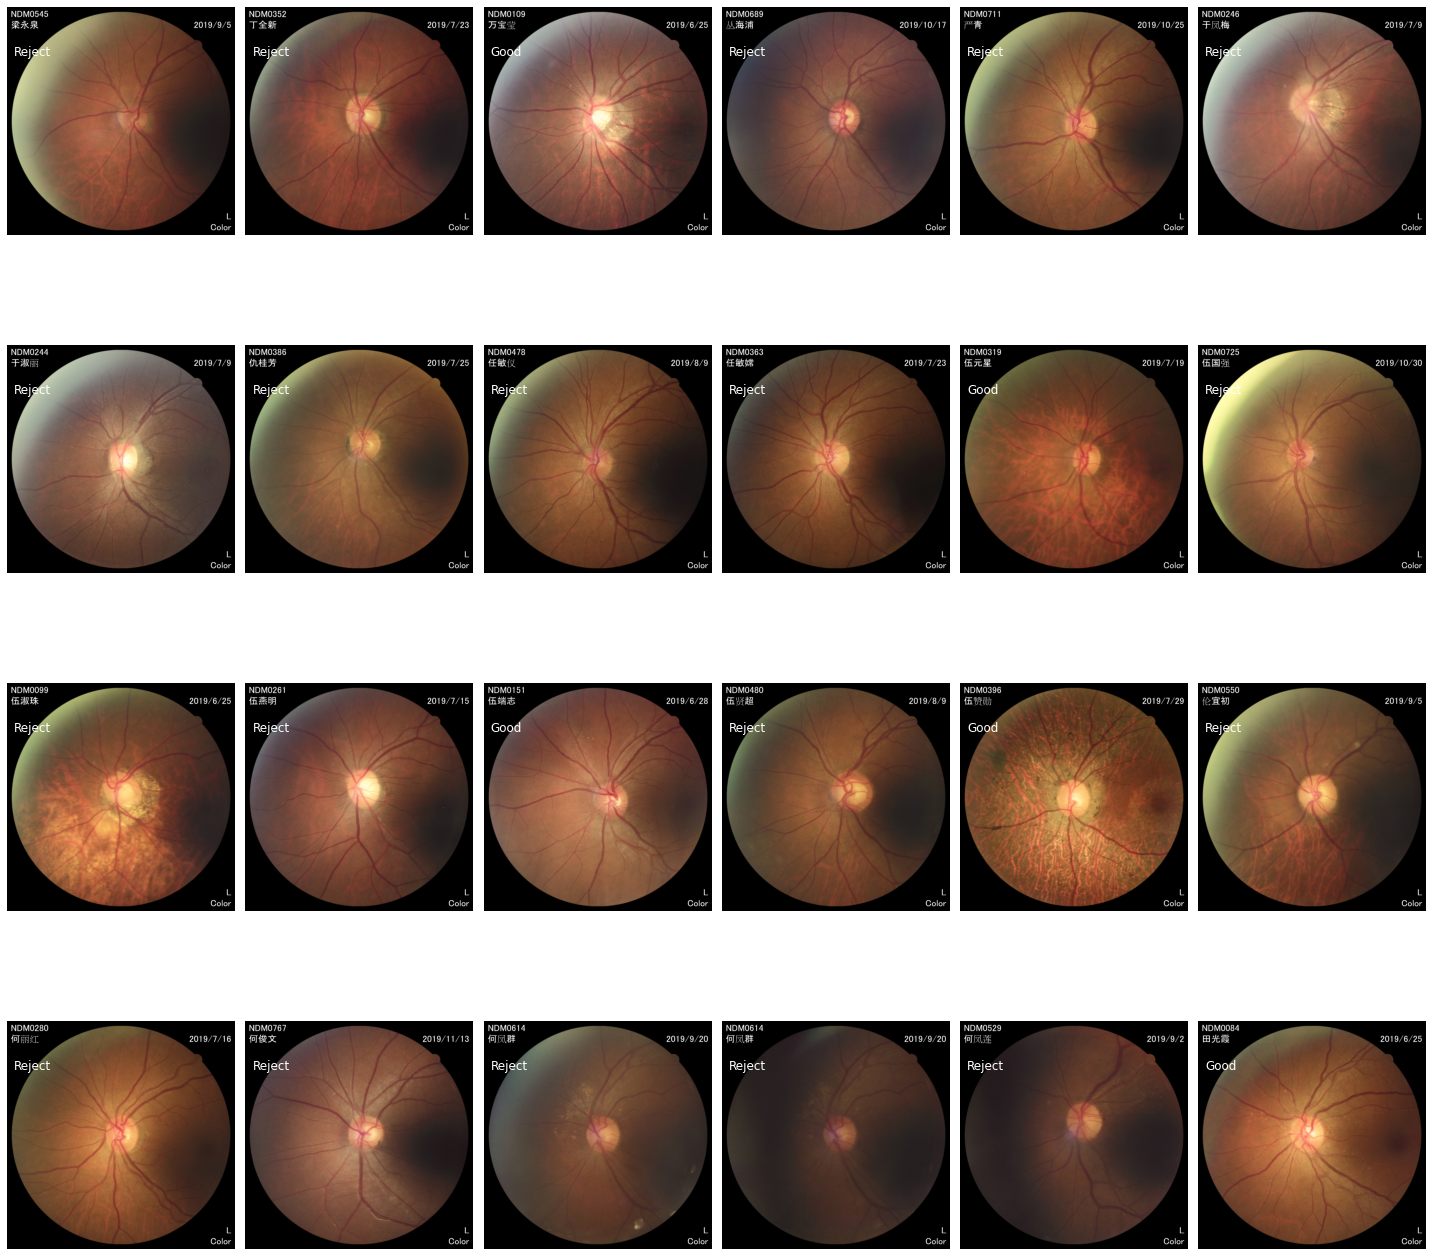

In [86]:
import matplotlib.pyplot as plt
show_img = True
if show_img:
    fig,axes=plt.subplots(4,6,figsize=(20,20))
    ax=axes.ravel()
    for i in range(24):
        path=lt.loc[i,'dir']
        q = lt.loc[i,'quality']
        img = Image.open(path)
        
        ax[i].imshow(img)
    #     ax[i].set_title(q)
        ax[i].text(50, 350, q, c='white', fontsize=12)
        ax[i].axis('off')
    plt.tight_layout()
    plt.savefig('/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/qc_samples/ukb_left_samples.png', dpi=600)
    plt.show()
else:
    for i in range(4):
        pl.figure(figsize=(5, 5))
        path=lt.loc[i,'dir']
        q = lt.loc[i,'quality']
        img = Image.open(path)
        pl.imshow(img)
    #     ax[i].set_title(q)
        pl.text(50, 150, q, c='white', fontsize=12)
        pl.axis('off')
        pl.tight_layout()
        pl.savefig('/media/zyi/litao/retinal_age_projects/data_proc/fundus_quality_2/qc_samples/ukb_left/' + os.path.basename(path), dpi=600)

In [9]:
#final[final['quality'] == 'Reject']
from os.path import join, exists
from shutil import copyfile

original = '/home/vision/data/workspace-cold/fundus-age/young-age/processed/'
good = '/home/vision/data/workspace-cold/fundus-age/young-age/quality/good'
usable = '/home/vision/data/workspace-cold/fundus-age/young-age/quality/usable'
reject = '/home/vision/data/workspace-cold/fundus-age/young-age/quality/reject'

for row in final.values.tolist():
    filename = row[0]
    if row[3] == 'Good':
        copyfile(join(original, filename), join(good, filename))
    elif row[3] == 'Usable':
        copyfile(join(original, filename), join(usable, filename))
    elif row[3] == 'Reject':
        copyfile(join(original, filename), join(reject, filename))
